# This is an analysis of the Breast cancer dataset and two supervised learning models to predict malignant tumors. 

## Reading the files and labels
The data itself doesnt contain any labels. Labels are instead provided in an accompanying field_names.txt file. This section cleans up the dataframe. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("breast-cancer.csv")

In [4]:
# convert the field_names.txt into headers
with open("field_names.txt", "r") as file:
    newline_break = ""
    for readline in file: 
        line_strip = readline.strip()
        newline_break += line_strip+" "
    labels=newline_break.split()

In [5]:
df=pd.read_csv("breast-cancer.csv", names=labels)

## Perform Exploratory Data Analysis on the data

This section uses basic pandas and seaborn commands to explore the data. Standard commands like head, info, shape to identify the dataset. A standard check for missing values was conducted, but removed as there were no missing values

In [6]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

In [8]:
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.shape

(569, 32)

In [10]:
df["diagnosis"].unique() #types of diagnosis

array(['M', 'B'], dtype=object)

## Analysis of specific features of the dataset
In this section, we analyse the mean and median smoothnes and compactness of benign and malignant tumors using the python groupby() function

In [11]:
df.drop(['ID'],1, inplace=True)

In [12]:
#group by diagnosis
df_diagnosis=df.groupby("diagnosis")

Taking a look at the mean and median valies of the different features

In [13]:
pd.set_option('display.max_columns', None)
df_diagnosis.mean()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [14]:
df_diagnosis.median()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540,0.2575,1.1080,1.8510,19.630,0.006530,0.01631,0.018400,0.009061,0.01909,0.002808,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
M,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575,0.5472,1.1025,3.6795,58.455,0.006209,0.02859,0.037125,0.014205,0.01770,0.003739,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


Looking specifically at the mean and median values of smoothness and compactness. 
1. Smoothness: Class "M" has larger mean and median values
2. Compactness: Class "M" has larger mean and median values. 

## Generating Bootstrap samples of the dataset
Bootstrap sampling is a methof that involves drawing sample data repeadly with replacement from a datasource to estimate a population parameter

In [15]:
import numpy as np
import random

In [16]:
def bootstrapSample(size, data):
    return data.sample(n=size, replace=True, random_state=1)

In [17]:
xnew=bootstrapSample(10,df)

In [18]:
xnew.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
37,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.342,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
235,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,0.1517,0.05835,0.2589,1.503,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617
72,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,0.5907,1.041,3.705,69.47,0.005820,0.056160,0.042520,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
144,B,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.239,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
129,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,0.4953,1.199,2.765,63.33,0.005033,0.031790,0.047550,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465


In [19]:
xnew.shape

(10, 31)

# Exploratory identification of predictive variables

In this section we describe the variables through a series of histograms to identify their distribution. The analysis assumes that the features are independent of each other, which may not be true, according to the correlation matrix. 

In [20]:
#draw some plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df.corr()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_sd_error,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_sd_error,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
perimeter_worst,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
area_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Draw histograms of the different features to find their distributions per class

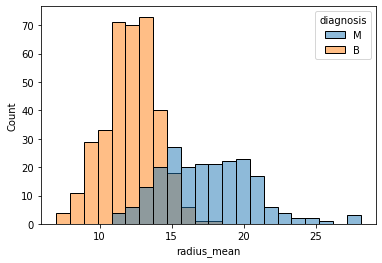

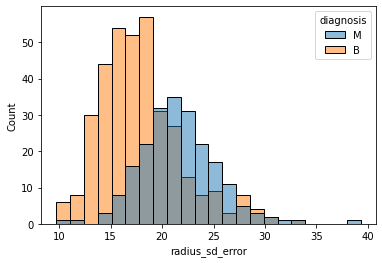

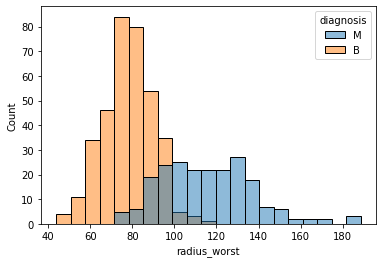

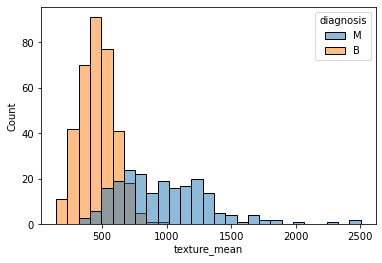

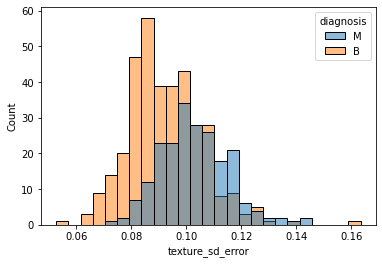

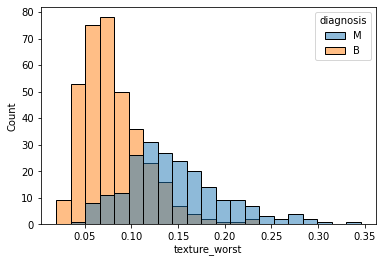

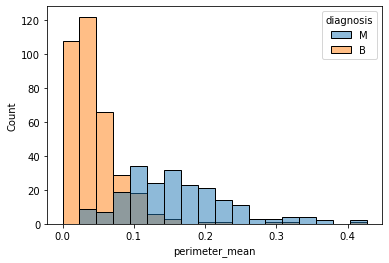

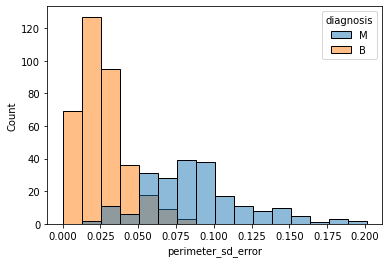

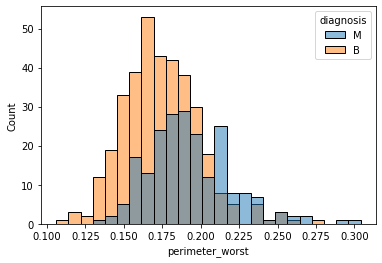

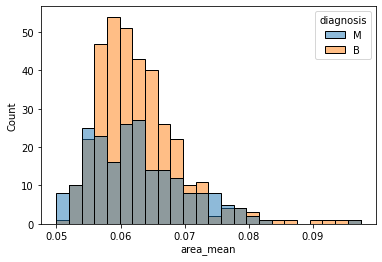

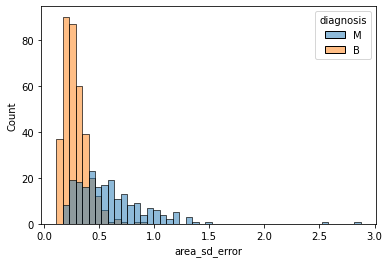

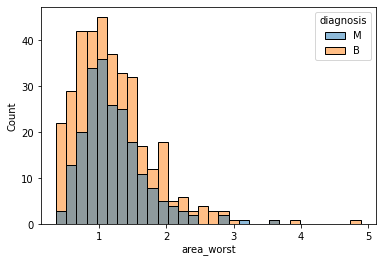

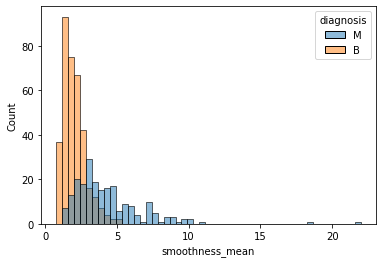

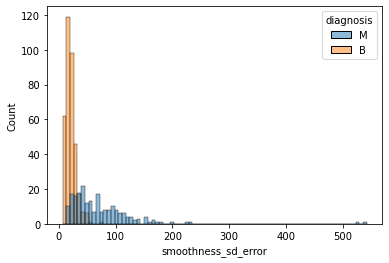

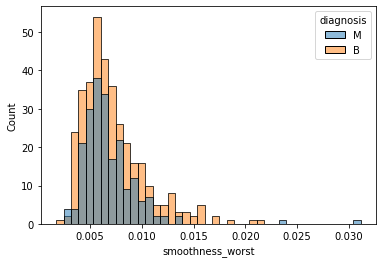

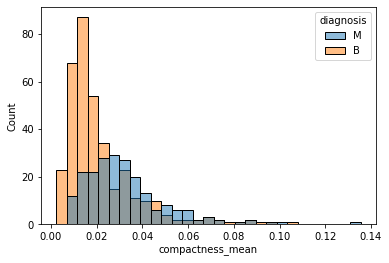

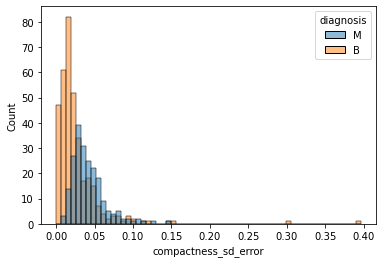

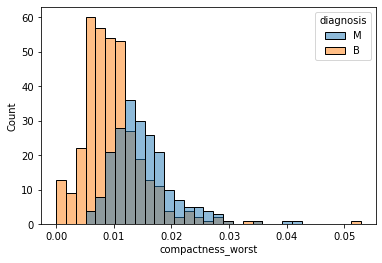

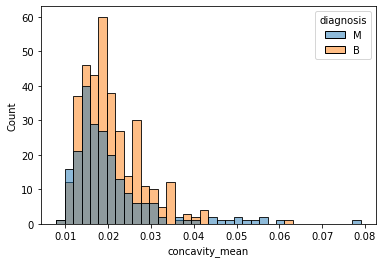

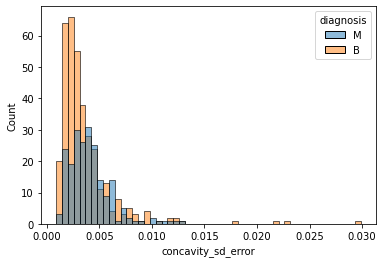

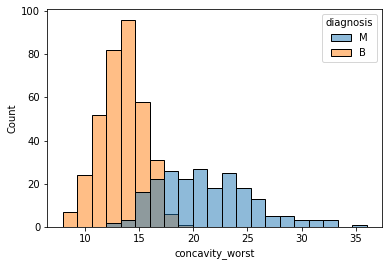

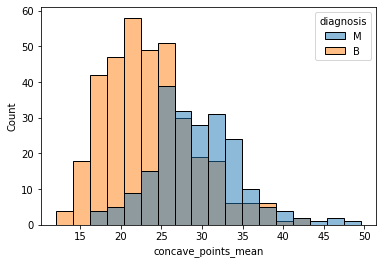

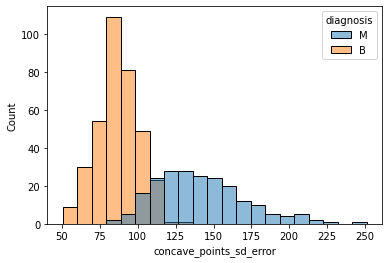

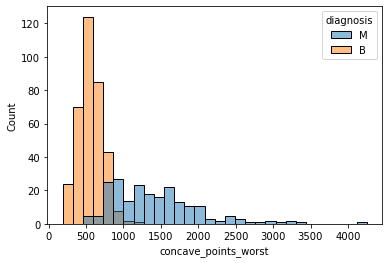

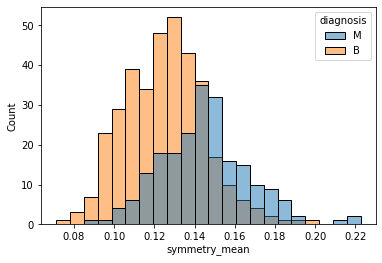

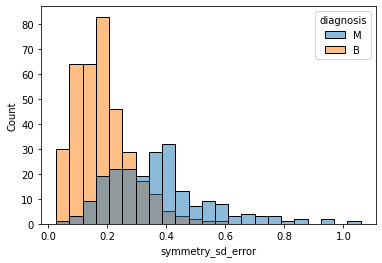

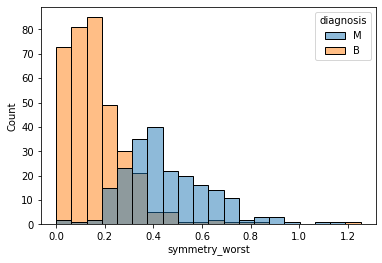

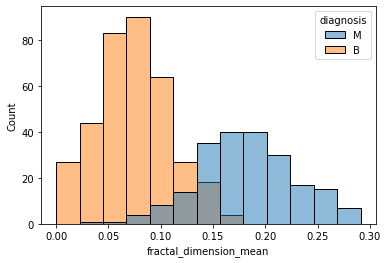

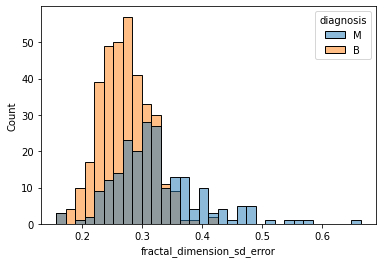

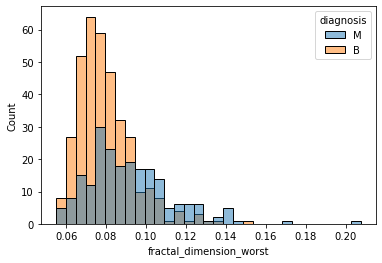

In [22]:
for i in range(1,len(df.columns)): #row 0 is diagnosis
    plt.figure()
    sns.histplot(df,x=df.columns[i], hue='diagnosis')

# Exploratory analysis with simple histograms

The following features are more significant between M and B
1. radius_mean
2. radius_worst
3. texture_mean
4. perimeter_mean
5. perimeter_sd_error
6. concavity_worst
7. concave_points_sd_error
8. concave_points_worst
9. symmetry_worst
10. fractal_dimension_mean

Checking a Correlation of these features, as shown below, shows the least correlated features to be 

#### radius_mean, perimeter_mean, fractal_dimension_mean, symmetry_worst. 

#### So we will select these four for the prediction model. 


## Prediction model
Using the Scikit learn cheat sheet <https://scikit-learn.org/stable/tutorial/machine_learning_map/> since the number of samples is small, and data is labelled, we will use the KNN and SVC classifiers to get model the data

In [23]:
import sklearn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

We will create two different datasets to train, X with all the features, Xss with  the selected 4 features and compare the accuracy between the two.  


In [24]:
#y is the dataframe with diagnosis
y=df['diagnosis']

In [25]:
#for training data, lets use two separate training data, to see the importance of feature selection. 
#There are obviously more mathematically robust ways of doing this, such as using Principle Components. 
X=df.drop(['diagnosis'], 1) #this is the full dataset. 
X_SelectedFeatures=df[['radius_mean','radius_worst','texture_mean','perimeter_mean','perimeter_sd_error','concavity_worst',
                     'concave_points_sd_error','concave_points_worst','symmetry_worst','fractal_dimension_mean']] 
Xss=df[['radius_mean', 'perimeter_mean', 'symmetry_worst', 'fractal_dimension_mean']]

In [26]:
X_SelectedFeatures.corr()

,radius_mean,radius_worst,texture_mean,perimeter_mean,perimeter_sd_error,concavity_worst,concave_points_sd_error,concave_points_worst,symmetry_worst,fractal_dimension_mean
radius_mean,1.000000,0.997855,0.987357,0.676764,0.822529,0.969539,0.965137,0.941082,0.526911,0.744214
radius_worst,0.997855,1.000000,0.986507,0.716136,0.850977,0.969476,0.970387,0.941550,0.563879,0.771241
texture_mean,0.987357,0.986507,1.000000,0.685983,0.823269,0.962746,0.959120,0.959213,0.512606,0.722017
perimeter_mean,0.676764,0.716136,0.685983,1.000000,0.921391,0.688236,0.729565,0.675987,0.884103,0.861323
perimeter_sd_error,0.822529,0.850977,0.823269,0.921391,1.000000,0.830318,0.855923,0.809630,0.752399,0.910155
concavity_worst,0.969539,0.969476,0.962746,0.688236,0.830318,1.000000,0.993708,0.984015,0.573975,0.787424
concave_points_sd_error,0.965137,0.970387,0.959120,0.729565,0.855923,0.993708,1.000000,0.977578,0.618344,0.816322
concave_points_worst,0.941082,0.941550,0.959213,0.675987,0.809630,0.984015,0.977578,1.000000,0.543331,0.747419
symmetry_worst,0.526911,0.563879,0.512606,0.884103,0.752399,0.573975,0.618344,0.543331,1.000000,0.855434
fractal_dimension_mean,0.744214,0.771241,0.722017,0.861323,0.910155,0.787424,0.816322,0.747419,0.855434,1.000000


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #splitting the full Dataset
Xs_train, Xs_test, y_train, y_test = train_test_split(X_SelectedFeatures, y, test_size=0.2) #splitting the selected feature Dataset
Xss_train, Xss_test, y_train, y_test = train_test_split(Xss, y, test_size=0.2) #splitting the selected feature Dataset


In [28]:
seed = 101
scoring = 'accuracy'

### Generate models1: KNN and SVM classifiers for all the features. 
We expect that the accuracy for this dataset will be quite low as there are a number of redundant features
THe accuracy for Kth nearest neighbour (K=5) is 0.56, and SVM is 0.61

In [29]:
models1 = []
models1.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models1.append(('SVM', SVC()))

# evaluate each model in turn for full dataset
results = []
names = []

for name, model in models1:
    kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.553865 (0.092151)
SVM: 0.624155 (0.062948)


In [30]:
#Make predictions on the full feature set
for name, model in models1:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.6140350877192983
              precision    recall  f1-score   support

           B       0.66      0.84      0.73        73
           M       0.43      0.22      0.29        41

    accuracy                           0.61       114
   macro avg       0.54      0.53      0.51       114
weighted avg       0.57      0.61      0.58       114

SVM
0.6403508771929824
              precision    recall  f1-score   support

           B       0.64      1.00      0.78        73
           M       0.00      0.00      0.00        41

    accuracy                           0.64       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.41      0.64      0.50       114



### Generate models3: KNN and SVM classifiers for subset of features
We expect that this accuracy will be much higher for the carefully selected subset of features. Sure enough, the accuracy is around 0.9 with both methods

In [31]:
models3 = []
models3.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models3.append(('SVM', SVC()))

# evaluate each model in turn for the dataset with smallest features
results = []
names = []

for name, model in models3:
    kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, Xss_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.905507 (0.027936)
SVM: 0.883623 (0.029304)


In [32]:
#Make predictions
for name, model in models3:
    model.fit(Xss_train, y_train)
    predictions = model.predict(Xss_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.8859649122807017
              precision    recall  f1-score   support

           B       0.91      0.92      0.91        73
           M       0.85      0.83      0.84        41

    accuracy                           0.89       114
   macro avg       0.88      0.87      0.88       114
weighted avg       0.89      0.89      0.89       114

SVM
0.8859649122807017
              precision    recall  f1-score   support

           B       0.87      0.97      0.92        73
           M       0.94      0.73      0.82        41

    accuracy                           0.89       114
   macro avg       0.90      0.85      0.87       114
weighted avg       0.89      0.89      0.88       114

